# Review Analysis

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,reviews
0,On arriving at Mexico Airport we were told tha...
1,I have flown British Airways for many years an...
2,"We bought tickets for a Geneva-London flight, ..."
3,Appalling service with failing defective fleet...
4,British Airways charge you for the pleasure of...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1

# Apply sentiment analysis to cleaned reviews
df['Sentiment'] = df['reviews'].apply(get_sentiment)

print("\nDataFrame with Sentiment Scores:")
print(df[['reviews', 'Sentiment']])



DataFrame with Sentiment Scores:
                                               reviews  Sentiment
0    On arriving at Mexico Airport we were told tha...  -0.042815
1    I have flown British Airways for many years an...   0.049053
2    We bought tickets for a Geneva-London flight, ...   0.000000
3    Appalling service with failing defective fleet...   0.006250
4    British Airways charge you for the pleasure of...   0.165332
..                                                 ...        ...
995  London Heathrow to Austin. 10 hour flight in a...  -0.188889
996  Mykonos to London flight delayed and waiting t...  -0.766667
997  Johannesburg to Cape Town return. This flight ...   0.089202
998  Grenada to Gatwick. Having flown with BA on th...   0.086503
999  Prague to London. A two hour flight on 27th Ju...   0.158333

[1000 rows x 2 columns]


In [ ]:
import re
from gensim import corpora
from gensim.models import LdaModel

# Tokenize the cleaned reviews
tokenized_reviews = [re.split(r'\W+', review.lower()) for review in df['reviews']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.042*"to" + 0.041*"the" + 0.029*"i" + 0.026*"and" + 0.020*"a" + 0.016*"was" + 0.014*"flight" + 0.013*"my" + 0.012*"in" + 0.012*"for"
Topic 1: 0.051*"the" + 0.030*"and" + 0.025*"was" + 0.023*"to" + 0.021*"a" + 0.016*"in" + 0.015*"of" + 0.013*"on" + 0.011*"flight" + 0.009*"for"


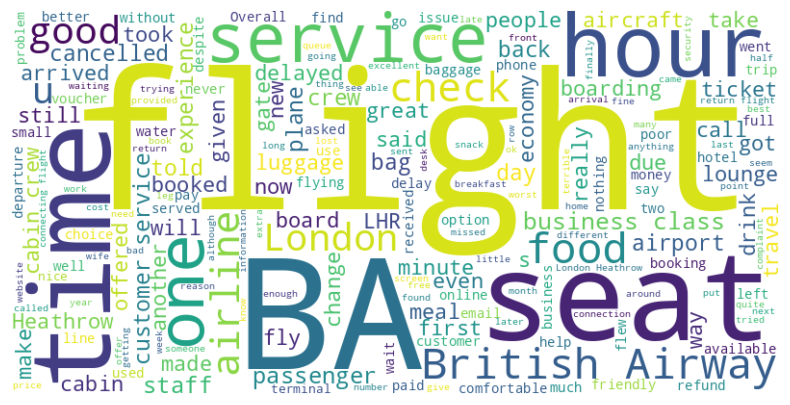

In [ ]:
from wordcloud import WordCloud

# Join all cleaned reviews into a single string
all_reviews = ' '.join(df['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Word to search for
word_to_find = "flight"

# Create a boolean mask
mask = df['reviews'].str.contains(word_to_find, case=False)  # case=False makes it case-insensitive

# Filter DataFrame based on the mask
matching_reviews = df[mask]

print("\nReviews containing the word '{}':".format(word_to_find))
print(matching_reviews)



Reviews containing the word 'flight':
                                               reviews  Sentiment
0    On arriving at Mexico Airport we were told tha...  -0.042815
1    I have flown British Airways for many years an...   0.049053
2    We bought tickets for a Geneva-London flight, ...   0.000000
3    Appalling service with failing defective fleet...   0.006250
6    We booked two business class seat with British...  -0.255556
..                                                 ...        ...
995  London Heathrow to Austin. 10 hour flight in a...  -0.188889
996  Mykonos to London flight delayed and waiting t...  -0.766667
997  Johannesburg to Cape Town return. This flight ...   0.089202
998  Grenada to Gatwick. Having flown with BA on th...   0.086503
999  Prague to London. A two hour flight on 27th Ju...   0.158333

[814 rows x 2 columns]


In [ ]:
# Filter negative reviews
negative_reviews = df[df['Sentiment'] < 0]

print("Negative Reviews:")
print(negative_reviews[['reviews', 'Sentiment']])


Negative Reviews:
                                               reviews  Sentiment
0    On arriving at Mexico Airport we were told tha...  -0.042815
5    What is wrong with you guys? People pay lots o...  -0.052083
6    We booked two business class seat with British...  -0.255556
11   British Airways Flight from Edinburgh got dela...  -0.085714
15   Horrible service from boarding to landing. I f...  -0.628333
..                                                 ...        ...
983  Palma to London Heathrow. How does British Air...  -0.074786
984  London City to Ibiza. Disappointing. All the f...  -0.012963
986  Calgary to London. Staff were not in high stan...  -0.062727
995  London Heathrow to Austin. 10 hour flight in a...  -0.188889
996  Mykonos to London flight delayed and waiting t...  -0.766667

[373 rows x 2 columns]


In [ ]:
tokenized_reviews = [re.split(r'\W+', review.lower()) for review in negative_reviews['reviews']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.043*"to" + 0.041*"the" + 0.025*"and" + 0.021*"i" + 0.018*"a" + 0.017*"was" + 0.014*"we" + 0.014*"flight" + 0.013*"in" + 0.011*"for"
Topic 1: 0.047*"the" + 0.025*"and" + 0.025*"to" + 0.019*"a" + 0.018*"was" + 0.016*"of" + 0.014*"i" + 0.013*"in" + 0.011*"is" + 0.010*"on"


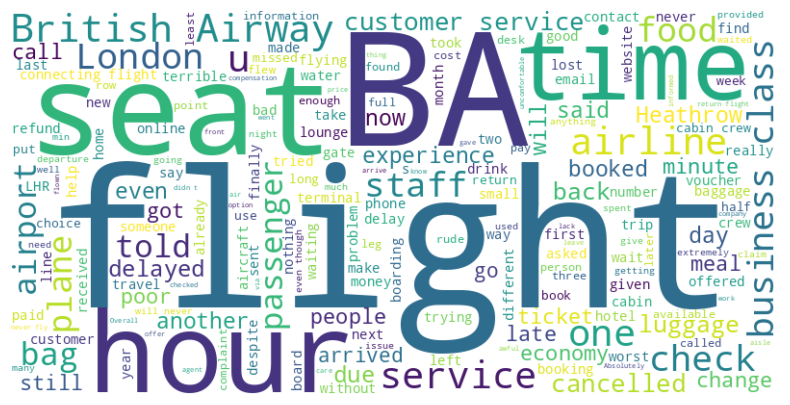

In [ ]:
# Join all cleaned reviews into a single string

all_reviews = ' '.join(negative_reviews['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def categorize_review(review):
    if any(keyword in review.lower() for keyword in ["rude", "terrible", "bad", "poor", "mediocre","customer service","service","staff","check","luggage","airport","airline","ticket"]):
        return "Service Issues"
    elif any(keyword in review.lower() for keyword in ["uncomfortable", "legroom","seat","business class","economy class"]):
        return "Comfort Issues"
    elif any(keyword in review.lower() for keyword in ["delayed", "schedule","delay","time","late"]):
        return "Delay Issues"
    elif any(keyword in review.lower() for keyword in ["food"]):
        return "Food Issues"
    else:
        return "Other"

# Apply categorization to the reviews
df['Category'] = df['reviews'].apply(categorize_review)

# Filter negative reviews (if needed)
df['Sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
negative_reviews = df[df['Sentiment'] < 0]

# Group reviews by category and display
grouped_reviews = negative_reviews.groupby('Category')['reviews'].apply(list).reset_index()

print("Grouped Negative Reviews by Category:")
for _, row in grouped_reviews.iterrows():
    print(f"\nCategory: {row['Category']}")
    for review in row['reviews']:
        print(f"- {review}")

Grouped Negative Reviews by Category:

Category: Comfort Issues
- Absolutely disgusted with BA. Our flights were cancelled on 1 May by BA even though the flight still departed. We had a connecting flight from Manchester to Heathrow which was cancelled due to weather so could not get compensation for that flight. But now it turns out we cannot get compensation for our flight to Seattle either even though BA actually cancelled it for us. I will never fly with them again.
- Delayed flight 1 hour. Arbitrary cancellation of paid for reserved seats - no response to formal complaint or explanation. Flight back to London cancelled giving 3 days notice. No reason given. Alternative flight offered two days later. Travelling with son and daughter.
- Paid for business class travelling Cairo to London Heathrow but all I got was an economy seat. Only difference from economy is middle seat was vacant. Couldn't recline, no entertainment for the 5hr+ flight, uncomfortable seat and disgusting food. Put 

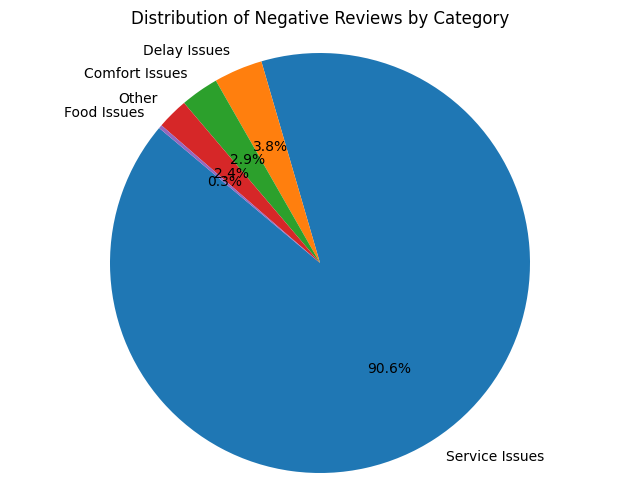

In [ ]:
category_counts = negative_reviews['Category'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Negative Reviews by Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [ ]:
service_issues_reviews = negative_reviews[negative_reviews['Category'] == 'Service Issues']
category_counts = service_issues_reviews.value_counts()
category_counts

,,,count
reviews,Sentiment,Category,
". The BA first lounge at Terminal 5 was a zoo at 2pm, dirty tables and used tableware everywhere. Worse than this, the usual atrocious boarding gate service, and boarding started 50 mins late. The flight was operated by a Finnair A320, which is barely low cost standard let alone business class. Hard, thin, uncomfortable seats, poor legroom and the cabin was simply tatty - I remain shocked that BA allow this, and it's time for BA's CEO and management focused on standards rather than bean counting. Finnair cabin staff were fundamentally courteous, but they provide a very trimmed down, budget airline type service, as the whole trip turned out to be - and yet this business class ticket was one of the more expensive on recent trips. I thought post Covid that BA were better for a few months, but with the many cost cuts they are making, they fall well below all other European full service Airlines.",-0.089712,Service Issues,1
"On arriving at Mexico Airport we were told that the flight was delayed because the aircraft had broken down and the replacement aircraft from LHR was about six hours late. When we eventually managed to check in we told that – contrary to the BA website – we could not have access to the 24-hour Grand Lounge Elite and instead would use the American Airlines Admirals Club lounge which would close three hours before the flight left. After that we would have to use a restaurant and were given a food voucher. Two hours before the flight was due to leave were then informed that the aircraft had diverted to Cancun because of a “volcanic ash cloud over Mexico City” – although it did not appear to be affecting other flights into the airport including those from Europe. They eventually arranged taxis to take us to a hotel and we arrived at 1.30am. We were assured that we would all be on a BA flight leaving the same time the following day. The only contact after that was a local employee who stayed at the hotel. He said that he was there to organise transport and refused to give us any other contact details. (When we eventually did need transport the following day he had disappeared.) During the night, we were then sent an email telling us that we were booked onto an Air Canada flight leaving at 6.30am. This would have been impossible with such short notice and without Canadian EPA authorisation. We then spent two hours trying to make contact with BA – its Mexico number did not work and eventually we were put on an Aeromexico flight in economy. They told us to check in as soon as we could but this meant we had to pay an extra £200 for the seats. Later, after a very long call, we were told that we could be upgraded to business with Aeromexico despite having been told earlier that there was no availability. BA then informed us that because we had already checked in – as they had suggested – we could not be moved and this took three more calls to Aeromexico to sort out. I totally understand that aircraft break down but the onus should be on the airline to rearrange and not the passengers. We were lucky because we took the trouble of making the calls to the UK but others – such as a disabled lady – had been told nothing when we left.",-0.042815,Service Issues,1
Our connecting flight from London to Glasgow was canceled and we were forced to wait 12 hours in the airport for a new flight. When we received our luggage at Glasgow we discovered that our luggage was soaking wet. My wife’s luggage contents were wet and had to be air dried.,-0.112727,Service Issues,1
"Our Good Friday flight was delayed by 5hours, STD 12.50 ATD 18.00 TO Durban, South Africa from Johannesburg. There were no announcements made, when approached no time frame was given, they simply didn't know. An aircraft had to be towed from a hanger at Johannesburg. Crew arrived late. The aircraft was filthy. We shall never fly Comair again that includes Kulula or BA absolutely shocking service.",-0.300000,Service Issues,1
"Orlando t

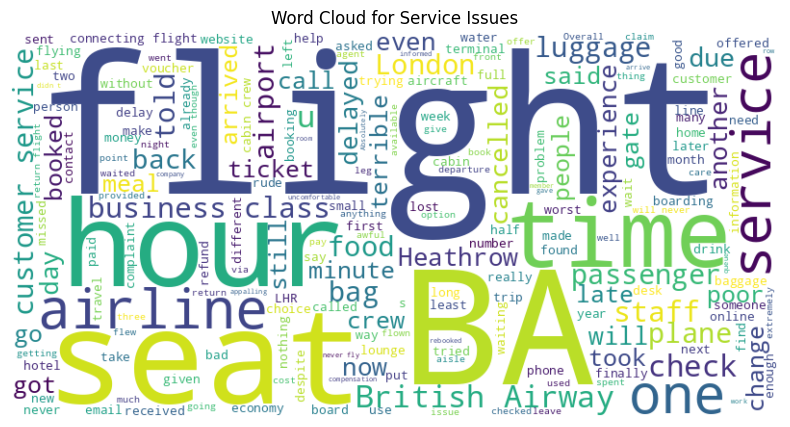

In [ ]:
service_issues_reviews = negative_reviews[negative_reviews['Category'] == 'Service Issues']

# Combine all service issues reviews into a single text
service_issues_text = " ".join(service_issues_reviews['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(service_issues_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Service Issues')
plt.show()

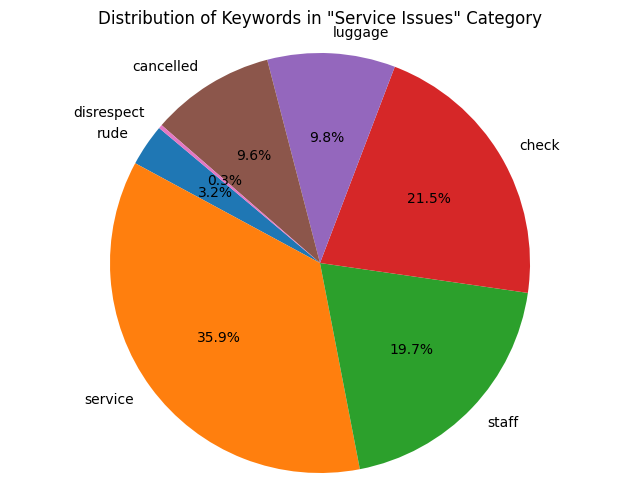

In [ ]:
category_to_check = 'Service Issues'

# Define the keywords to analyze
keywords_to_check = ['rude',"service","staff","check","luggage","cancelled","disrespect"]

# Filter for the specific category
filtered_reviews = df[df['Category'] == category_to_check]

# Count the number of reviews containing each keyword
keyword_counts = {}
for keyword in keywords_to_check:
    keyword_counts[keyword] = filtered_reviews['reviews'].str.contains(keyword, case=False, na=False).sum()

# Convert the counts to a DataFrame for easier plotting
keyword_counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(keyword_counts_df['Count'], labels=keyword_counts_df['Keyword'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Keywords in "{category_to_check}" Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

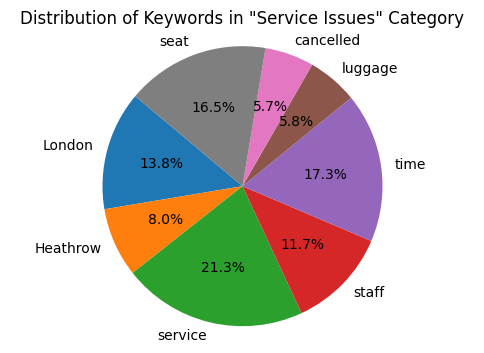

In [ ]:
category_to_check = 'Service Issues'

# Define the keywords to analyze
keywords_to_check = ['London','Heathrow',"service","staff","time","luggage","cancelled","seat"]

# Filter for the specific category
filtered_reviews = df[df['Category'] == category_to_check]

# Count the number of reviews containing each keyword
keyword_counts = {}
for keyword in keywords_to_check:
    keyword_counts[keyword] = filtered_reviews['reviews'].str.contains(keyword, case=False, na=False).sum()

# Convert the counts to a DataFrame for easier plotting
keyword_counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(keyword_counts_df['Count'], labels=keyword_counts_df['Keyword'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Keywords in "{category_to_check}" Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [ ]:
positive_reviews = df[df['Sentiment'] > 0]

# Display the positive reviews
print("Positive Reviews:")
print(positive_reviews[['reviews', 'Sentiment']])

Positive Reviews:
                                               reviews  Sentiment
1    I have flown British Airways for many years an...   0.049053
3    Appalling service with failing defective fleet...   0.006250
4    British Airways charge you for the pleasure of...   0.165332
7    I’ve flown with many airlines, but my recent e...   0.019805
8    I recently flew from New York back to London w...   0.180978
..                                                 ...        ...
993  I was flying BA to Delhi in economy because my...   0.293182
994  Seattle to Durban via London. On 24th of July ...   0.026296
997  Johannesburg to Cape Town return. This flight ...   0.089202
998  Grenada to Gatwick. Having flown with BA on th...   0.086503
999  Prague to London. A two hour flight on 27th Ju...   0.158333

[615 rows x 2 columns]


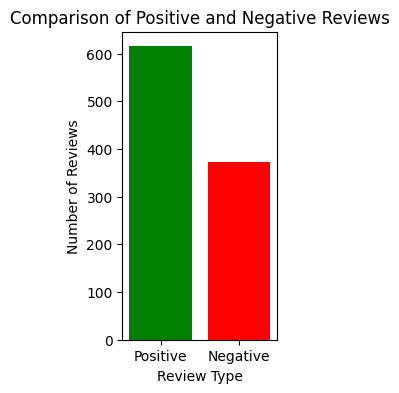

In [ ]:
# Plotting bar chart to compare positive and negative review counts
review_counts = [len(positive_reviews), len(negative_reviews)]
review_labels = ["Positive", "Negative"]

plt.figure(figsize=(2, 4))
plt.bar(review_labels, review_counts, color=['green', 'red'])
plt.title("Comparison of Positive and Negative Reviews")
plt.xlabel("Review Type")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
# Total number of reviews
total_reviews = len(df)

# Number of positive and negative reviews
num_positive = len(positive_reviews)
num_negative = len(negative_reviews)

# Method 1: Percentage of positive reviews
percentage_positive = (num_positive / total_reviews) * 100

# Method 2: Average sentiment score
average_sentiment_score = df['Sentiment'].mean()

# Method 3: Scaled rating from 1 to 5 stars
scaled_rating = ((average_sentiment_score + 1) / 2) * 4 + 1

print("Percentage of Positive Reviews:", percentage_positive)
print("Average Sentiment Score:", average_sentiment_score)
print("Scaled Rating (1 to 5):", scaled_rating)


Percentage of Positive Reviews: 61.5
Average Sentiment Score: 0.05765981717360602
Scaled Rating (1 to 5): 3.115319634347212
